# Problem Statement

Take any dataset (after reading their descriptions, make sure it has multiple variables) from https://www2.stetson.edu/~jrasp/data.htm. This website is created by Dr. John Rasp as a vast collection of datasets for students to try out their statistics methods.

a) Find the Covariance matrix and Correlation matrix of this data matrix
b) Perform PCA/SVD, choose appropriate number(justify by a scree plot) of dimensions/principal components/singular values and find the new data matrix in terms of these dimensions.
c) Plot the scatter plot of this data along the first two dimensions (or three if it is possible)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dataset¶
This dataset contains 8 features and 97 rows

In [5]:
poverty_dataset=pd.read_excel('Poverty.xls')

In [6]:
pd.read_excel('poverty.xls')

,BirthRt,DeathRt,InfMort,LExpM,LExpF,GNP,Region,Country
0,24.7,5.7,30.8,69.6,75.5,600,1,Albania
1,12.5,11.9,14.4,68.3,74.7,2250,1,Bulgaria
2,13.4,11.7,11.3,71.8,77.7,2980,1,Czechoslovakia
3,12.0,12.4,7.6,69.8,75.9,*,1,Former_E._Germany
4,11.6,13.4,14.8,65.4,73.8,2780,1,Hungary
...,...,...,...,...,...,...,...,...
92,52.2,15.6,103.0,49.9,52.7,220,6,Uganda
93,50.5,14.0,106.0,51.3,54.7,110,6,Tanzania
94,45.6,14.2,83.0,50.3,53.7,220,6,Zaire
95,51.1,13.7,80.0,50.4,52.5,420,6,Zambia


In [7]:
print(poverty_dataset.columns)

Index(['BirthRt', 'DeathRt', 'InfMort', 'LExpM', 'LExpF', 'GNP', 'Region',
       'Country'],
      dtype='object')


In [8]:
print(len(poverty_dataset))
print(poverty_dataset.shape)
print(poverty_dataset.head())

97
(97, 8)
   BirthRt  DeathRt  InfMort  LExpM  LExpF   GNP  Region            Country
0     24.7      5.7     30.8   69.6   75.5   600       1            Albania
1     12.5     11.9     14.4   68.3   74.7  2250       1           Bulgaria
2     13.4     11.7     11.3   71.8   77.7  2980       1     Czechoslovakia
3     12.0     12.4      7.6   69.8   75.9     *       1  Former_E._Germany
4     11.6     13.4     14.8   65.4   73.8  2780       1            Hungary


In [9]:
complete_data=poverty_dataset
poverty_dataset=poverty_dataset.drop(['GNP','Country'],axis=1)

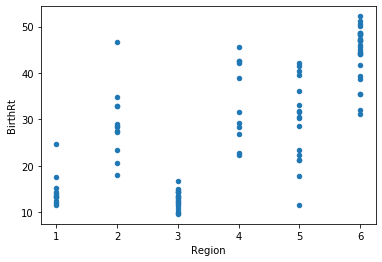

In [25]:
poverty_dataset.plot(kind='scatter',x='Region',y='BirthRt')
plt.show()

In [26]:
poverty_dataset.describe()

,BirthRt,DeathRt,InfMort,LExpM,LExpF,Region
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,29.229897,10.836082,54.901031,61.485567,66.151134,3.948454
std,13.546695,4.647495,45.992584,9.615970,11.005391,1.740277
min,9.700000,2.200000,4.500000,38.100000,41.200000,1.000000
25%,14.500000,7.800000,13.100000,55.800000,57.500000,3.000000
50%,29.000000,9.500000,43.000000,63.700000,67.800000,4.000000
75%,42.200000,12.500000,83.000000,68.600000,75.400000,6.000000
max,52.200000,25.000000,181.600000,75.900000,81.800000,6.000000


# Principal Component Analysis

In [27]:
X_s=poverty_dataset.iloc[:,0:5]
Y_s=poverty_dataset.iloc[:,5]

In [28]:
x_vec=X_s.values
y_vec=Y_s.values

In [29]:
print(type(x_vec))
n=len(x_vec)

<class 'numpy.ndarray'>


In [30]:
Cov_matrix=np.cov(x_vec.T)

In [32]:
print(Cov_matrix)

[[ 183.51295103   30.61005584  534.79496886 -112.8767515  -133.34521134]
 [  30.61005584   21.59920533  139.92589991  -32.77874463  -35.44690593]
 [ 534.79496886  139.92589991 2115.31781143 -414.3292558  -483.56686576]
 [-112.8767515   -32.77874463 -414.3292558    92.46687285  103.98164154]
 [-133.34521134  -35.44690593 -483.56686576  103.98164154  121.11862474]]


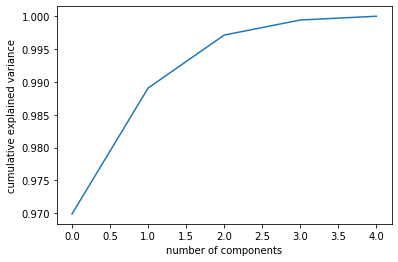

In [38]:
from sklearn.decomposition import PCA
pca=PCA().fit(x_vec)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [39]:
pca = PCA(n_components=1)
newdata = pca.fit_transform(x_vec)

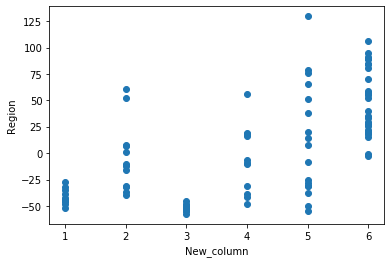

In [43]:
plt.scatter(y_vec,newdata)
plt.xlabel('New_column')
plt.ylabel('Region')
plt.show()

For reducing original 5 Dimentions (BirthRt, DeathRt, InfMort, LExpM, LExpF) into 2-Dimentions(feat1,feat2)

In [83]:
#taking top two components
pca2=PCA(2)
new_dataset=pca2.fit_transform(x_vec)
new_dataframe=pd.DataFrame(data=new_dataset,columns=['colm1','colm2'])

In [84]:
((new_dataframe).head())

,colm1,colm2
0,-27.236608,-0.650739
1,-44.570397,5.693905
2,-48.526605,5.058115
3,-51.493645,4.589038
4,-43.596494,6.157510


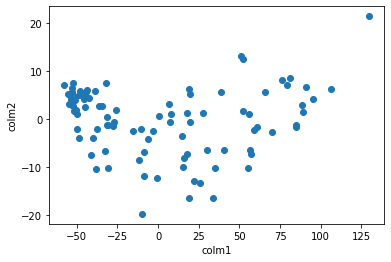

In [85]:
plt.scatter(new_dataframe['colm1'],new_dataframe['colm2'])
plt.xlabel('colm1')
plt.ylabel('colm2')
plt.show()

For reducing original 5 Dimentions (BirthRt, DeathRt, InfMort, LExpM, LExpF) into 3-Dimentions(feat1,feat2,feat3)

In [86]:
pca3=PCA(3)
new_dataset3=pca3.fit_transform(x_vec)
new_dataframe3=pd.DataFrame(data=new_dataset3,columns=['colm1','colm2','colm3'])
(new_dataframe3.head())

,colm1,colm2,colm3
0,-27.236608,-0.650739,-6.119314
1,-44.570397,5.693905,4.662044
2,-48.526605,5.058115,1.712026
3,-51.493645,4.589038,5.111772
4,-43.596494,6.157510,7.740559


# Singular Matrix Decomposition

In [87]:
from sklearn.decomposition import TruncatedSVD as SVD

In [88]:
U, s, V = np.linalg.svd(x_vec)

In [89]:
cum_sum=np.cumsum(s)

In [90]:
svd=SVD(2)
x_reduced=svd.fit_transform(x_vec)

In [91]:
x_red_dataframe=pd.DataFrame(data=x_reduced,columns=['colm1','colm2'])
(x_red_dataframe.head())

,colm1,colm2
0,104.519526,-34.581237
1,91.568739,-48.129960
2,93.659122,-53.193095
3,89.207849,-54.638704
4,89.635040,-46.327881


Reducing 5 dimentional original vector into 2-dimentional vector

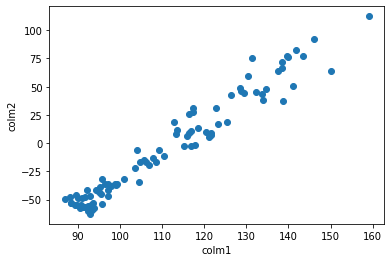

In [92]:
plt.scatter(x_red_dataframe['colm1'],x_red_dataframe['colm2'])
plt.xlabel('colm1')
plt.ylabel('colm2')
plt.show()

In [93]:
from mpl_toolkits.mplot3d import Axes3D
svd=SVD(3)
x_reduced3=svd.fit_transform(x_vec)
x_red_df3=pd.DataFrame(data=x_reduced3,columns=['colm1','colm2','colm3'])
(x_red_df3.head())

,colm1,colm2,colm3
0,104.519526,-34.581237,-1.496896
1,91.568739,-48.129960,6.099489
2,93.659122,-53.193095,4.918539
3,89.207849,-54.638704,4.984207
4,89.635040,-46.327881,6.964281


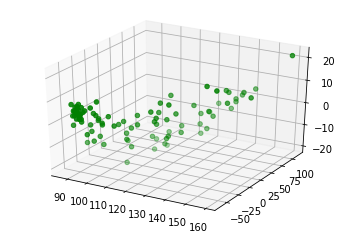

In [94]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = plt.axes(projection='3d')
ax.scatter(x_red_df3['colm1'],x_red_df3['colm2'],x_red_df3['colm3'],color='green')